# **Anomaly Detection and Data Labeling: Adaptive Model Scheduling using SVM, K-means, and Isolation Forest**

# **IMPORT THE REQUIRES LIBRARIES**

In [1]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, f1_score

Load Dataset

In [2]:
# Load the XLSX file into a pandas DataFrame
df = pd.read_excel('/content/drive/MyDrive/SWaT_dataset_Jul19v2_clean.xlsx')

# Print the first 5 rows of the DataFrame
print(df.head())

               Timestamp   FIT 101     LIT 101  MV 101  P1_STATE  P101 Status  \
0  20/07/2019 4:39:59 PM  4.323736  492.896881       2         2            2   
1  20/07/2019 4:39:58 PM  4.323736  492.465100       2         2            2   
2  20/07/2019 4:39:57 PM  4.303558  492.308100       2         2            2   
3  20/07/2019 4:39:56 PM  4.253915  491.405273       2         2            2   
4  20/07/2019 4:39:55 PM  4.200429  491.169769       2         2            2   

   P102 Status     AIT 201   AIT 202     AIT 203  ...  LSH 601 LSH 602  \
0            1  131.408615  9.313829  257.933868  ...   Active  Active   
1            1  131.408615  9.316713  257.703156  ...   Active  Active   
2            1  131.408615  9.317354  257.703156  ...   Active  Active   
3            1  131.408615  9.317354  257.703156  ...   Active  Active   
4            1  131.408615  9.319918  257.703156  ...   Active  Active   

    LSH 603   LSL 601   LSL 602  LSL 603  P6 STATE  P601 Status  P60

# **DATA EXPLORATION**

In [3]:
# Print the shape of the DataFrame (number of rows and columns)
print(df.shape)

# Print the column names of the DataFrame
print(df.columns)

(14996, 78)
Index(['Timestamp', 'FIT 101', 'LIT 101', 'MV 101', 'P1_STATE', 'P101 Status',
       'P102 Status', 'AIT 201', 'AIT 202', 'AIT 203', 'FIT 201', 'LS 201',
       'LS 202', 'LSL 203', 'LSLL 203', 'MV201', 'P2_STATE', 'P201 Status',
       'P202 Status', 'P203 Status', 'P204 Status', 'P205 Status',
       'P206 Status', 'P207 Status', 'P208 Status', 'AIT 301', 'AIT 302',
       'AIT 303', 'DPIT 301', 'FIT 301', 'LIT 301', 'MV 301', 'MV 302',
       'MV 303', 'MV 304', 'P3_STATE', 'P301 Status', 'P302 Status', 'AIT 401',
       'AIT 402', 'FIT 401', 'LIT 401', 'LS 401', 'P4_STATE', 'P401 Status',
       'P402 Status', 'P403 Status', 'P404 Status', 'UV401', 'AIT 501',
       'AIT 502', 'AIT 503', 'AIT 504', 'FIT 501', 'FIT 502', 'FIT 503',
       'FIT 504', 'MV 501', 'MV 502', 'MV 503', 'MV 504', 'P5_STATE',
       'P501 Status', 'P502 Status', 'PIT 501', 'PIT 502', 'PIT 503',
       'FIT 601', 'LSH 601', 'LSH 602', 'LSH 603', 'LSL 601', 'LSL 602',
       'LSL 603', 'P6 STATE',

In [4]:
# Print summary statistics of numerical columns
print(df.describe())

            FIT 101       LIT 101        MV 101      P1_STATE   P101 Status  \
count  14996.000000  14996.000000  14996.000000  14996.000000  14996.000000   
mean       0.740876    733.960251      1.156175      2.061616      1.374166   
std        1.634632    110.960185      0.384272      0.240466      0.483923   
min        0.000000    491.169769      0.000000      2.000000      1.000000   
25%        0.000000    640.595184      1.000000      2.000000      1.000000   
50%        0.000000    819.636841      1.000000      2.000000      1.000000   
75%        0.000000    820.971436      1.000000      2.000000      2.000000   
max        4.403484    825.092957      2.000000      3.000000      2.000000   

       P102 Status       AIT 201       AIT 202       AIT 203       FIT 201  \
count      14996.0  14996.000000  14996.000000  14996.000000  14996.000000   
mean           1.0    138.766501      9.210022    247.985162      0.869760   
std            0.0      8.265845      0.175812     11.

In [5]:
# Print the number of unique values in each column
print(df.nunique())

Timestamp      14991
FIT 101          310
LIT 101         4493
MV 101             3
P1_STATE           2
               ...  
LSL 603            1
P6 STATE           1
P601 Status        2
P602 Status        1
P603 Status        1
Length: 78, dtype: int64


In [6]:
# Print the data types of each column
print(df.dtypes)

Timestamp       object
FIT 101        float64
LIT 101        float64
MV 101           int64
P1_STATE         int64
                ...   
LSL 603         object
P6 STATE         int64
P601 Status      int64
P602 Status      int64
P603 Status      int64
Length: 78, dtype: object


In [7]:
# Print the number of missing values in each column
print(df.isnull().sum())

Timestamp      0
FIT 101        0
LIT 101        0
MV 101         0
P1_STATE       0
              ..
LSL 603        0
P6 STATE       0
P601 Status    0
P602 Status    0
P603 Status    0
Length: 78, dtype: int64


In [8]:
print(df.head)

<bound method NDFrame.head of                     Timestamp   FIT 101     LIT 101  MV 101  P1_STATE  \
0       20/07/2019 4:39:59 PM  4.323736  492.896881       2         2   
1       20/07/2019 4:39:58 PM  4.323736  492.465100       2         2   
2       20/07/2019 4:39:57 PM  4.303558  492.308100       2         2   
3       20/07/2019 4:39:56 PM  4.253915  491.405273       2         2   
4       20/07/2019 4:39:55 PM  4.200429  491.169769       2         2   
...                       ...       ...         ...     ...       ...   
14991  20/07/2019 12:30:04 PM  0.000000  727.706900       1         3   
14992  20/07/2019 12:30:03 PM  0.000000  728.688200       1         3   
14993  20/07/2019 12:30:02 PM  0.000000  729.120000       1         3   
14994  20/07/2019 12:30:01 PM  0.000000  729.434000       1         3   
14995  20/07/2019 12:30:00 PM  0.000000  729.865800       1         3   

       P101 Status  P102 Status     AIT 201   AIT 202     AIT 203  ...  \
0                2 

# **DATA PREPROCESSING**

In [3]:
# Convert Timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [4]:
# Subset the dataset to only include records between 12:35 PM and 4:35 PM on 20 July 2019
start_time = pd.to_datetime("2019-07-20 12:35:00")
end_time = pd.to_datetime("2019-07-20 16:35:00")
df = df[(df['Timestamp'] >= start_time) & (df['Timestamp'] <= end_time)]

In [11]:
# Print the shape of the DataFrame (number of rows and columns)
print(df.shape)

(14397, 78)


In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Encoding and Filtering

In [5]:
# Select only the categorical columns
cat_cols = ["P1_STATE", "P2_STATE", "P3_STATE", "P4_STATE", "P5_STATE", "P6 STATE",
            "P101 Status", "P102 Status", "P201 Status", "P202 Status", "P203 Status",
            "P204 Status", "P205 Status", "P206 Status", "P207 Status", "P208 Status",
            "P301 Status", "P302 Status", "LS 201", "LS 202", "LSL 203", "LSLL 203",
            "MV201", "MV 301", "MV 302", "MV 303", "MV 304", "UV401",
            "MV 501", "MV 502", "MV 503", "MV 504",
            "P501 Status", "P502 Status"]
df_cat = df[cat_cols]

# Perform one-hot encoding on the state columns
ohe = OneHotEncoder(sparse=False)
state_ohe = ohe.fit_transform(df_cat[["P1_STATE", "P2_STATE", "P3_STATE",
                                      "P4_STATE", "P5_STATE", "P6 STATE"]])
state_ohe_df = pd.DataFrame(state_ohe, columns=ohe.get_feature_names_out(["P1_STATE",
                                                                      "P2_STATE",
                                                                      "P3_STATE",
                                                                      "P4_STATE",
                                                                      "P5_STATE",
                                                                      "P6 STATE"]))
df_cat = pd.concat([df_cat, state_ohe_df], axis=1).drop(["P1_STATE",
                                                         "P2_STATE",
                                                         "P3_STATE",
                                                         "P4_STATE",
                                                         "P5_STATE",
                                                         "P6 STATE"], axis=1)

# Perform label encoding on the status columns
le = LabelEncoder()
for col in df_cat.columns:
    if col.startswith("LS") or col.startswith("MV") or col.startswith("UV") or col.endswith("Status") and col !="Timestamp":
        df_cat[col] = le.fit_transform(df_cat[col])
        
# Overwrite only the categorical columns in df with the encoded columns from df_cat
df.update(df_cat)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-5-fc5bf2bc959a>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(df_cat)
<ipython-input-5-fc5bf2bc959a>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(df_cat)
<ipython-input-5-fc5bf2bc959a>:35: SettingWi

# **Data Labeling and Normalizing**

In [6]:
df = df.set_index('Timestamp')
# Label the attacks as binary
df['Attack'] = 0
# Attack on FIT401
df.loc[(df.index >= pd.to_datetime("2019-07-20 15:08:46")) & (df.index <= pd.to_datetime("2019-07-20 15:10:31")), 'Attack'] = 1
# Attack on LIT301
df.loc[(df.index >= pd.to_datetime("2019-07-20 15:15:00")) & (df.index <= pd.to_datetime("2019-07-20 15:19:32")), 'Attack'] = 1
# Attack on P601
df.loc[(df.index >= pd.to_datetime("2019-07-20 15:26:57")) & (df.index <= pd.to_datetime("2019-07-20 15:30:48")), 'Attack'] = 1
# Multi-point Attack
df.loc[(df.index >= pd.to_datetime("2019-07-20 15:38:50")) & (df.index <= pd.to_datetime("2019-07-20 15:46:20")), 'Attack'] = 1
# Attack on MV501
df.loc[(df.index >= pd.to_datetime("2019-07-20 15:54:00")) & (df.index <= pd.to_datetime("2019-07-20 15:56:00")), 'Attack'] = 1
# Attack on P301
df.loc[(df.index >= pd.to_datetime("2019-07-20 16:02:56")) & (df.index <= pd.to_datetime("2019-07-20 16:16:18")), 'Attack'] = 1

In [7]:
total_labeled_rows = len(df[df['Attack'] == 1])
print("Total number of rows labeled with attacks:", total_labeled_rows)
total_nonlabeled_rows = len(df[df['Attack'] == 0])
print("Total number of rows not labeled:", total_nonlabeled_rows)

Total number of rows labeled with attacks: 1986
Total number of rows not labeled: 12411


In [8]:
from sklearn.preprocessing import StandardScaler

# Separate the Attack column
attack_series = df.pop('Attack')

# Normalize the numeric columns, exclude the Attack column
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col != 'Attack']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Add the Attack column back to the dataframe
df['Attack'] = attack_series

# Fill missing values with zeros
df.fillna(0, inplace=True)

# Drop unnecessary columns
columns_to_drop = ['LS 401', 'LSH 601', 'LSH 602', 'LSH 603', 'LSL 601', 'LSL 602', 'LSL 603']
df.drop(columns_to_drop, axis=1, inplace=True)

In [16]:
print(df.head())

                      FIT 101   LIT 101    MV 101  P1_STATE  P101 Status  \
Timestamp                                                                  
2019-07-20 16:35:00 -0.463164 -1.072026 -0.417491 -0.212852     1.368395   
2019-07-20 16:34:59 -0.463164 -1.061974 -0.417491 -0.212852     1.368395   
2019-07-20 16:34:58 -0.463164 -1.056230 -0.417491 -0.212852     1.368395   
2019-07-20 16:34:57 -0.463164 -1.053357 -0.417491 -0.212852     1.368395   
2019-07-20 16:34:56 -0.463164 -1.046895 -0.417491 -0.212852     1.368395   

                     P102 Status   AIT 201   AIT 202   AIT 203   FIT 201  ...  \
Timestamp                                                                 ...   
2019-07-20 16:35:00          0.0 -0.870361  0.566302  0.009090  1.372166  ...   
2019-07-20 16:34:59          0.0 -0.870361  0.584273  0.009090  1.372166  ...   
2019-07-20 16:34:58          0.0 -0.870361  0.584273  0.009090  1.371237  ...   
2019-07-20 16:34:57          0.0 -0.870361  0.584273  0.009090

In [17]:
if (df['Attack'] > 0 ).any():
  print("The Attack column has values greater than 0")
else:
  print("it has none")

The Attack column has values greater than 0


In [ ]:
# filtered_df = df[df['Attack'] != 0]
# print(filtered_df)

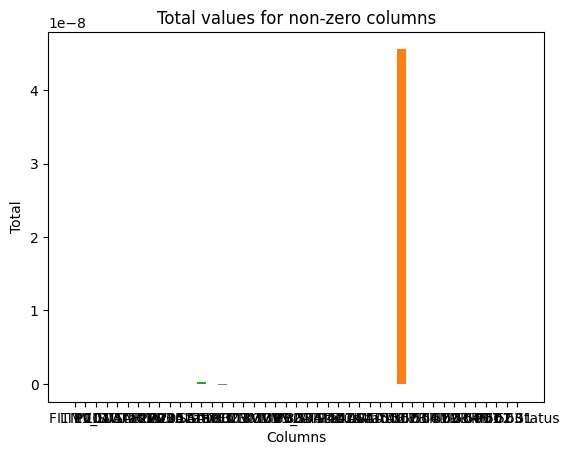

In [17]:
# Create a Boolean mask indicating which columns have no 0 values
no_zero_mask = (df != 0).all()

# Select the columns with no 0 values and create a bar chart for each column
no_zero_cols = df.columns[no_zero_mask]
for col in no_zero_cols:
    plt.bar(col, df[col].sum())

# Set the chart title and axis labels
plt.title("Total values for non-zero columns")
plt.xlabel("Columns")
plt.ylabel("Total")

# Show the chart
plt.show()


In [18]:
print(df.columns)

Index(['FIT 101', 'LIT 101', 'MV 101', 'P1_STATE', 'P101 Status',
       'P102 Status', 'AIT 201', 'AIT 202', 'AIT 203', 'FIT 201', 'LS 201',
       'LS 202', 'LSL 203', 'LSLL 203', 'MV201', 'P2_STATE', 'P201 Status',
       'P202 Status', 'P203 Status', 'P204 Status', 'P205 Status',
       'P206 Status', 'P207 Status', 'P208 Status', 'AIT 301', 'AIT 302',
       'AIT 303', 'DPIT 301', 'FIT 301', 'LIT 301', 'MV 301', 'MV 302',
       'MV 303', 'MV 304', 'P3_STATE', 'P301 Status', 'P302 Status', 'AIT 401',
       'AIT 402', 'FIT 401', 'LIT 401', 'P4_STATE', 'P401 Status',
       'P402 Status', 'P403 Status', 'P404 Status', 'UV401', 'AIT 501',
       'AIT 502', 'AIT 503', 'AIT 504', 'FIT 501', 'FIT 502', 'FIT 503',
       'FIT 504', 'MV 501', 'MV 502', 'MV 503', 'MV 504', 'P5_STATE',
       'P501 Status', 'P502 Status', 'PIT 501', 'PIT 502', 'PIT 503',
       'FIT 601', 'P6 STATE', 'P601 Status', 'P602 Status', 'P603 Status',
       'Attack'],
      dtype='object')


# **Adaptive Model Scheduling and SVM Algorithm Implementation**

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
# import random
# random.seed(0)

# Set up parameters for adaptive model scheduling
performance_threshold = 0.8
change_threshold = 0.2
n_normal_samples = len(df.loc[df.Attack == 1])

# Train initial model
train_data = df.loc[df.Attack == 0]
test_data_anomaly = df.loc[df.Attack == 1]
test_data_anomaly_with_attack = df.loc[df.Attack == 1].copy()
train_data_normal = train_data.sample(n_normal_samples, random_state=0)
test_data = pd.concat([test_data_anomaly, train_data_normal])[train_data.columns]


iforest = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.13, n_jobs=-1)
iforest.fit(train_data)
kmeans = KMeans(n_clusters=2)
kmeans.fit(train_data)
svm = SVC(kernel='linear', probability=True)
svm_data = np.column_stack((iforest.predict(test_data), kmeans.predict(test_data)))
svm.fit(svm_data, test_data.index.isin(test_data_anomaly.index))

# Adaptive model scheduling
change_count = 0
while True:
    # Evaluate performance of current model
    probabilities = pd.DataFrame(svm.predict_proba(svm_data), columns=['Normal', 'Anomaly'])
    probabilities = probabilities['Anomaly']
    y_true = test_data_anomaly['Attack']
    # y_true = pd.Series(index=test_data.index, data=0)
    y_true.loc[test_data_anomaly.index] = 1
    y_pred = probabilities[:len(y_true)] > 0.5
    # y_pred = probabilities > 0.5
    # Evaluate performance of current model
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    print('F1 score: {:.2f}'.format(f1))
    print('Accuracy: {:.2f}'.format(accuracy))

    # Check if the model performance has dropped below the threshold
    if f1 < performance_threshold:
        change_count += 1
        # Check if we have reached the change threshold
        if change_count >= len(train_data):
            print('Unable to improve model performance')
            break
        # Select a subset of normal training data to add to the test data
        train_data_normal = train_data.sample(n_normal_samples, random_state=0)
        test_data = pd.concat([test_data_anomaly, train_data_normal])[train_data.columns]
        # Retrain model on new data
        iforest = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.13, n_jobs=-1)
        iforest.fit(train_data)
        kmeans = KMeans(n_clusters=2)
        kmeans.fit(train_data)
        svm = SVC(kernel='linear', probability=True)
        svm_data = np.column_stack((iforest.predict(test_data), kmeans.predict(test_data)))
        svm.fit(svm_data, test_data.index.isin(test_data_anomaly.index))
        print('Model retrained with new data')
    else:
        print('Model performance is good enough')
        break


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.59
Accuracy: 0.42


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.56
Accuracy: 0.39


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data
F1 score: 0.78
Accuracy: 0.64


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.56
Accuracy: 0.39


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data
F1 score: 0.70
Accuracy: 0.54


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.61
Accuracy: 0.44


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.70
Accuracy: 0.54


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.45
Accuracy: 0.29


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.68
Accuracy: 0.51


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data
F1 score: 0.75
Accuracy: 0.60


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.57
Accuracy: 0.40


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.47
Accuracy: 0.31


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.63
Accuracy: 0.46


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.60
Accuracy: 0.43


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.54
Accuracy: 0.37


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.63
Accuracy: 0.46


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.72
Accuracy: 0.56


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.48
Accuracy: 0.31


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.63
Accuracy: 0.46


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.51
Accuracy: 0.35


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.75
Accuracy: 0.61


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.54
Accuracy: 0.37


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.62
Accuracy: 0.45


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.55
Accuracy: 0.38


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.58
Accuracy: 0.41


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.63
Accuracy: 0.46


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.68
Accuracy: 0.51


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data
F1 score: 0.72
Accuracy: 0.56


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.47
Accuracy: 0.31


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.58
Accuracy: 0.41


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


F1 score: 0.66
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model retrained with new data
F1 score: 0.85
Accuracy: 0.74
Model performance is good enough


<ipython-input-51-2e0bf43821a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true.loc[test_data_anomaly.index] = 1


In [ ]:
# print(test_data_anomaly.columns)
# print('---------')
# print(train_data.columns)
# print('---------')
# print(test_data_anomaly_with_attack.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


PR AUC: 0.87


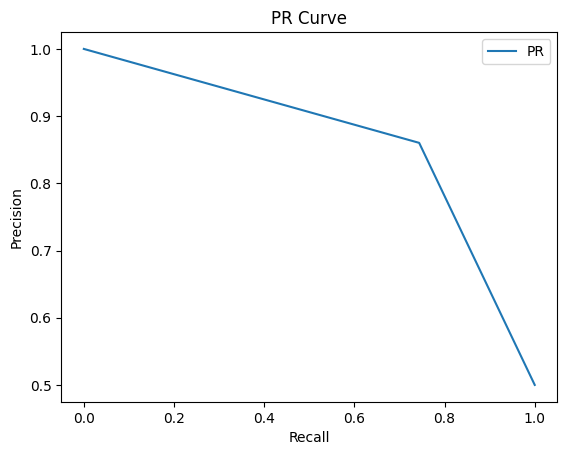

In [52]:
# Evaluate model
svm_data_test = np.column_stack((iforest.predict(test_data.values), kmeans.predict(test_data.values)))
y_test_true = test_data['Attack']
y_test_pred = svm.predict_proba(svm_data_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test_true, y_test_pred)

# Calculate and print AUC metrics for PR and ROC curves
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc:.2f}")

# Plot PR curve
plt.plot(recall, precision, label='PR')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.legend(loc='best')
plt.show()

In [53]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_true, y_test_pred > performance_threshold)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[1746  240]
 [ 509 1477]]
